# Marriage Decision-making using machine learning.

Utilizing machine learning techniques, our project aims to predict marriage compatibility and suitability by analyzing various
relationship factors. By developing a classification model, we provide data-driven decision support for marriage assessment and 
decision-making.

I am  going to take the following approach:

     1.Problem definition
     2.Data
     3.Evaluation
     4.Features
     5.Modelling
     6.Experimentation

# Problem Statement
Problem Statement: With a growing number of marriages ending in divorce, our objective is to develop a machine learning model that can effectively reduce divorce rates  by providing predictive insights and guidance for marital success with the help of Astrology.

# Data Description
Data Description: The dataset consists of individual records characterized by the zodiac signs and stars of both males and females involved in marriages. Each record includes additional attributes relevant to marriage compatibility and outcomes. By considering the astrological signs and stars, the dataset provides a unique perspective on exploring correlations and patterns related to marital success and compatibility.

# Evaluation Approach
Evaluation Approach: The developed machine learning model will be evaluated using a train-test split and performance metrics such as accuracy, precision, recall, and F1-score. Cross-validation and statistical analysis techniques will also be applied to assess the model's generalizability and effectiveness in reducing divorce rates.

# Feature Description
Feature Description: The project focuses on six key features that are crucial for marriage compatibility. These features will be weighted to determine their relative importance in predicting marriage outcomes and guiding decision-making processes.

Modelling

Experimentation

# Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.


In [1]:
# Import needed tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
# coverting text into numerical data
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


# Loading the data

In [2]:
df = pd.read_csv("final_dataset.csv")

# Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

    1.What question(s) are you trying to solve?
    2.What kind of data do we have and how do we treat different types?
    3.What's missing from the data and how do you deal with it?
    4.Where are the outliers and why should you care about them?
    5.How can you add, change or remove features to get more out of your data?

In [3]:
#Viewing Columns
df.columns

Index(['femalestar', 'malestar', 'femalerasi', 'malerasi', 'thinam_porutham',
       'kanam_porutham', 'magendhiram_porutham', 'sthirthirgam_porutham',
       'yoni_porutham', 'Rasi_porutham', 'rasi_adhipathi_porutham',
       'vasiyam_porutham', 'raji_porutham', 'vedhai_porutham', 'target'],
      dtype='object')

In [4]:
#Checking Null Values.
df.isnull().sum()

femalestar                 0
malestar                   0
femalerasi                 0
malerasi                   0
thinam_porutham            0
kanam_porutham             0
magendhiram_porutham       0
sthirthirgam_porutham      0
yoni_porutham              0
Rasi_porutham              0
rasi_adhipathi_porutham    0
vasiyam_porutham           0
raji_porutham              0
vedhai_porutham            0
target                     0
dtype: int64

In [5]:
#Checling whether the dataset is imbalanced or not
df["target"].value_counts()

0    705
1    591
Name: target, dtype: int64

<Axes: >

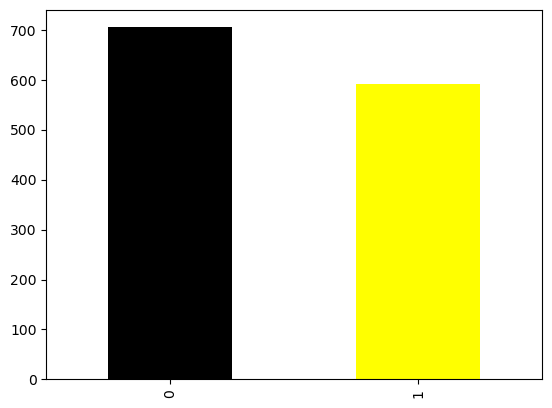

In [6]:
#plotting the datas based on value_counts
df["target"].value_counts().plot(kind = "bar",color = ["Black","yellow"])

In [7]:
#getting the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   femalestar               1296 non-null   object
 1   malestar                 1296 non-null   object
 2   femalerasi               1296 non-null   object
 3   malerasi                 1296 non-null   object
 4   thinam_porutham          1296 non-null   int64 
 5   kanam_porutham           1296 non-null   int64 
 6   magendhiram_porutham     1296 non-null   int64 
 7   sthirthirgam_porutham    1296 non-null   int64 
 8   yoni_porutham            1296 non-null   int64 
 9   Rasi_porutham            1296 non-null   int64 
 10  rasi_adhipathi_porutham  1296 non-null   int64 
 11  vasiyam_porutham         1296 non-null   int64 
 12  raji_porutham            1296 non-null   int64 
 13  vedhai_porutham          1296 non-null   int64 
 14  target                   1296 non-null  

In [8]:
#Description about the dataset.
df.describe()

,thinam_porutham,kanam_porutham,magendhiram_porutham,sthirthirgam_porutham,yoni_porutham,Rasi_porutham,rasi_adhipathi_porutham,vasiyam_porutham,raji_porutham,vedhai_porutham,target
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,0.483025,0.610340,0.215278,0.584877,0.727623,0.408179,0.608796,0.094907,0.777778,0.797068,0.456019
std,0.499905,0.487861,0.411174,0.492934,0.445354,0.491686,0.488208,0.293200,0.415900,0.402338,0.498254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# marriage compatibility based on total_compatibiliy
df.yoni_porutham.value_counts()

1    943
0    353
Name: yoni_porutham, dtype: int64

In [11]:
# Compare target column with total_compatibility column
pd.crosstab(df.target, df.yoni_porutham)

yoni_porutham,0,1
target,,
0,332,373
1,21,570


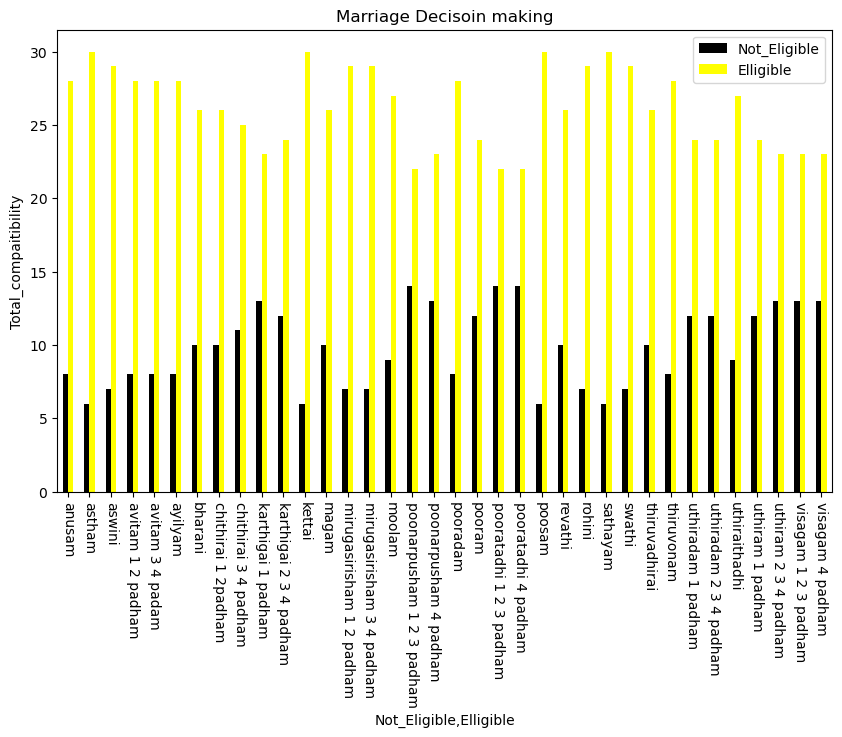

In [12]:
# Create a plot of crosstab
pd.crosstab(df.malestar,df.yoni_porutham).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["Black", "yellow"])

plt.title("Marriage Decisoin making")
plt.xlabel("Not_Eligible,Elligible")
plt.ylabel("Total_compaitibility")
plt.legend(["Not_Eligible", "Elligible"]);
plt.xticks(rotation=270);

# Malestar vs Femalestar for Marriage Eligibilty

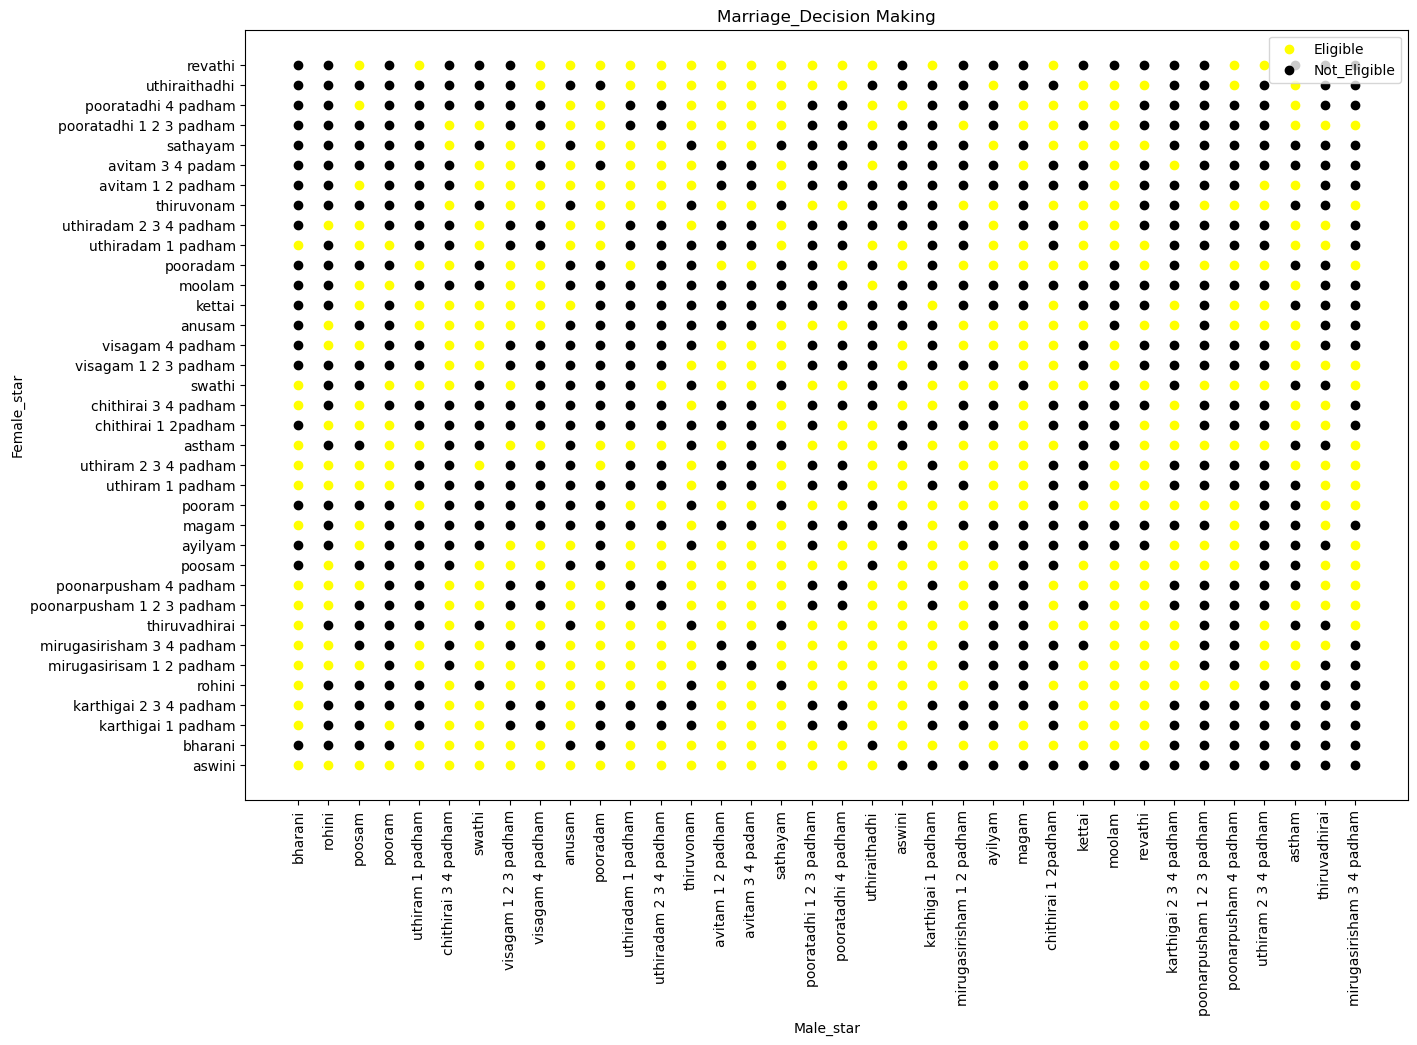

In [12]:
# Creating another plot
plt.figure(figsize=(15,10))

# Scatter with postivie examples
plt.scatter(df.malestar[df.target==1],
            df.femalestar[df.target==1],
            c="Yellow")
plt.xticks(rotation = 90)

# Scatter with negative examples
plt.scatter(df.malestar[df.target==0],
            df.femalestar[df.target==0],
            c="Black")

# Add some helpful info
plt.title("Marriage_Decision Making")
plt.xlabel("Male_star")
plt.ylabel("Female_star")
plt.legend(["Eligible", "Not_Eligible"]);

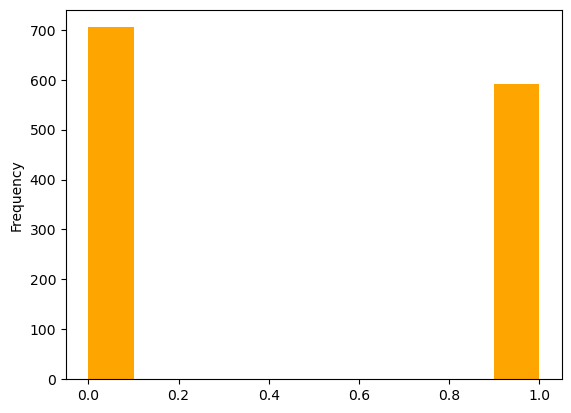

In [13]:
# Check the distribution of the total_Compatibility column with a histogram
df.target.plot.hist(color = "orange");

from the histogram we can see that only if there are minumum of 6 matches they are eligible for marriage

In [14]:
# Make a correlation matrix
df.corr()

C:\Users\abi14\AppData\Local\Temp\ipykernel_9672\1478283149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,thinam_porutham,kanam_porutham,magendhiram_porutham,sthirthirgam_porutham,yoni_porutham,Rasi_porutham,rasi_adhipathi_porutham,vasiyam_porutham,raji_porutham,vedhai_porutham,target
thinam_porutham,1.000000,0.316396,-0.029167,0.422631,0.404103,0.196289,0.344540,0.092660,0.516673,0.487728,0.531788
kanam_porutham,0.316396,1.000000,0.156735,0.364012,0.541820,0.274050,0.387245,0.091386,0.566217,0.623627,0.480608
magendhiram_porutham,-0.029167,0.156735,1.000000,0.010742,0.206602,0.118858,0.119812,0.067389,0.158046,0.264283,0.157444
sthirthirgam_porutham,0.422631,0.364012,0.010742,1.000000,0.497593,0.505310,0.341837,0.091151,0.634468,0.598923,0.614154
yoni_porutham,0.404103,0.541820,0.206602,0.497593,1.000000,0.345898,0.525294,0.150813,0.769418,0.824700,0.487105
Rasi_porutham,0.196289,0.274050,0.118858,0.505310,0.345898,1.000000,0.299000,-0.011816,0.353283,0.419042,0.528805
rasi_adhipathi_porutham,0.344540,0.387245,0.119812,0.341837,0.525294,0.299000,1.000000,0.113924,0.567927,0.621589,0.508558
vasiyam_porutham,0.092660,0.091386,0.067389,0.091151,0.150813,-0.011816,0.113924,1.000000,0.160424,0.163392,0.232100
raji_porutham,0.516673,0.566217,0.158046,0.634468,0.769418,0.353283,0.567927,0.160424,1.000000,0.934748,0.489401
vedhai_porutham,0.487728,0.623627,0.264283,0.598923,0.824700,0.419042,0.621589,0.163392,0.934748,1.000000,0.461984


C:\Users\abi14\AppData\Local\Temp\ipykernel_9672\1728207119.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(11.5, -0.5)

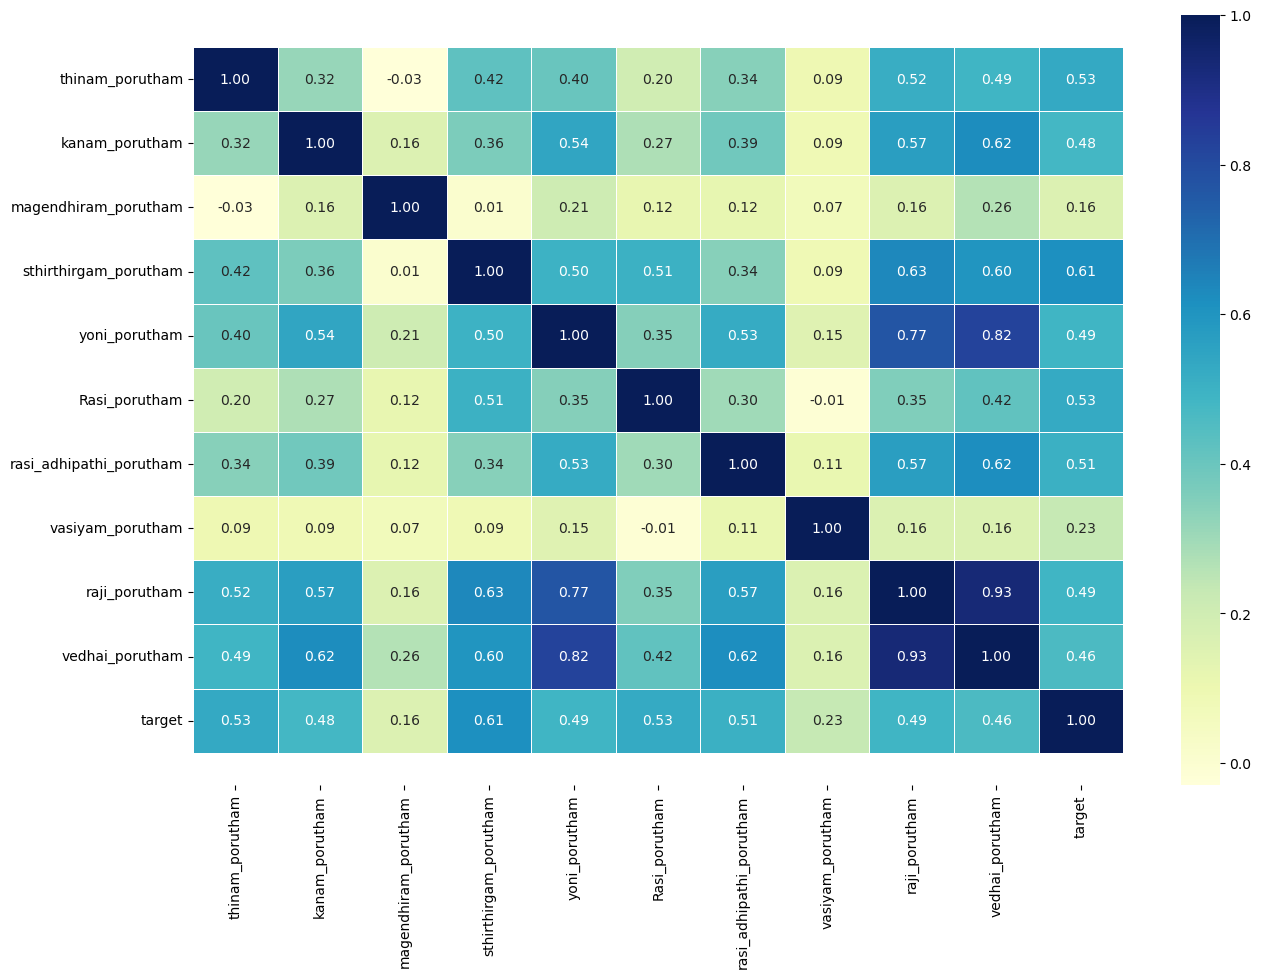

In [15]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 5.Modeling

In [16]:
df.head()

,femalestar,malestar,femalerasi,malerasi,thinam_porutham,kanam_porutham,magendhiram_porutham,sthirthirgam_porutham,yoni_porutham,Rasi_porutham,rasi_adhipathi_porutham,vasiyam_porutham,raji_porutham,vedhai_porutham,target
0,aswini,aswini,maesam,mesam,0,1,1,0,1,1,1,0,0,1,0
1,aswini,bharani,maesam,mesam,1,1,0,0,1,1,1,0,1,1,1
2,aswini,karthigai 1 padham,maesam,mesam,0,1,0,0,1,1,1,0,1,1,0
3,aswini,karthigai 2 3 4 padham,maesam,rishabam,0,1,0,0,1,0,1,0,1,1,0
4,aswini,rohini,maesam,rishabam,1,1,1,0,1,0,1,0,1,1,1


In [17]:
# splitting the data
x= df.drop(["target"],axis =1)

y = df["target"]

In [18]:
x

,femalestar,malestar,femalerasi,malerasi,thinam_porutham,kanam_porutham,magendhiram_porutham,sthirthirgam_porutham,yoni_porutham,Rasi_porutham,rasi_adhipathi_porutham,vasiyam_porutham,raji_porutham,vedhai_porutham
0,aswini,aswini,maesam,mesam,0,1,1,0,1,1,1,0,0,1
1,aswini,bharani,maesam,mesam,1,1,0,0,1,1,1,0,1,1
2,aswini,karthigai 1 padham,maesam,mesam,0,1,0,0,1,1,1,0,1,1
3,aswini,karthigai 2 3 4 padham,maesam,rishabam,0,1,0,0,1,0,1,0,1,1
4,aswini,rohini,maesam,rishabam,1,1,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,revathi,sathayam,meenam,kumbam,0,1,1,1,1,1,1,0,1,1
1292,revathi,pooratadhi 1 2 3 padham,meenam,kumbam,1,1,0,1,0,1,1,0,1,1
1293,revathi,pooratadhi 4 padham,meenam,meenam,1,1,0,1,0,1,1,0,1,1
1294,revathi,uthiraithadhi,meenam,meenam,1,1,0,1,1,1,1,0,1,1


In [19]:
y

0       0
1       1
2       0
3       0
4       1
       ..
1291    1
1292    1
1293    1
1294    1
1295    0
Name: target, Length: 1296, dtype: int64

In [20]:
categorical_features = ["femalestar", "malestar", "femalerasi", "malerasi"]

encoders = []
transformed_features = []

for feature in categorical_features:
    encoder = LabelEncoder()
    transformed_feature = encoder.fit_transform(x[feature])
    encoders.append(encoder)
    transformed_features.append(transformed_feature)

transformed_x = x.drop(categorical_features, axis=1)

for i, feature in enumerate(categorical_features):
    transformed_x[feature] = transformed_features[i]




In [21]:
# Getting the test and train data ready
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size = 0.2)

In [22]:
x_train

,thinam_porutham,kanam_porutham,magendhiram_porutham,sthirthirgam_porutham,yoni_porutham,Rasi_porutham,rasi_adhipathi_porutham,vasiyam_porutham,raji_porutham,vedhai_porutham,femalestar,malestar,femalerasi,malerasi
825,1,1,0,1,1,0,1,0,1,1,0,21,11,5
195,1,1,0,1,1,0,1,0,1,1,13,33,8,2
538,1,1,0,1,1,0,1,0,1,1,32,31,9,5
104,0,0,0,0,0,0,0,0,0,0,9,20,4,3
207,1,1,0,1,1,1,1,0,1,1,13,30,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,1,1,1,0,1,0,0,0,1,1,32,26,9,10
983,0,1,1,1,1,1,0,0,1,1,30,5,5,1
998,0,1,1,0,1,1,1,0,0,1,30,29,5,0
694,0,1,0,1,1,1,0,0,1,1,26,22,10,1


In [23]:
# Trying to find the best model
models = (KNeighborsClassifier(),RandomForestClassifier())

In [24]:
names=[]
scores=[]
for i in models :
    # Set random seed
    np.random.seed(42)
    model=i
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    print(str(i),"score=",score)
    names.append(str(i))
    scores.append(score)

KNeighborsClassifier() score= 0.65
RandomForestClassifier() score= 0.9769230769230769


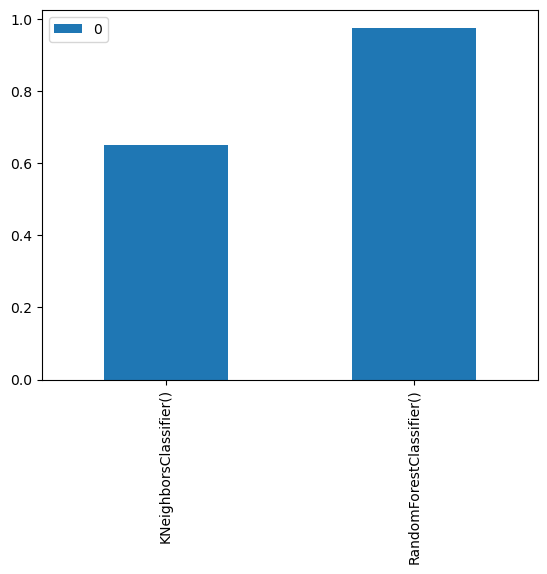

In [25]:
name_score_df = pd.DataFrame(scores, index=names)
name_score_df.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

Hypyterparameter tuning
Feature importance
Confusion matrix
Cross-validation
Precision
Recall
F1 score
Classification report
ROC curve
Area under the curve (AUC)

# Hyperparameter tuning (by hand)

In [26]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [27]:
train_scores

[1.0,
 0.8706563706563707,
 0.861969111969112,
 0.8011583011583011,
 0.8088803088803089,
 0.7828185328185329,
 0.7828185328185329,
 0.7712355212355212,
 0.7712355212355212,
 0.7615830115830116,
 0.7606177606177607,
 0.7442084942084942,
 0.75,
 0.7384169884169884,
 0.7326254826254827,
 0.7393822393822393,
 0.7413127413127413,
 0.7287644787644788,
 0.7364864864864865,
 0.7316602316602316]

In [28]:
test_scores

[0.6846153846153846,
 0.7038461538461539,
 0.6961538461538461,
 0.6846153846153846,
 0.65,
 0.65,
 0.6423076923076924,
 0.6576923076923077,
 0.6653846153846154,
 0.6807692307692308,
 0.6730769230769231,
 0.6807692307692308,
 0.6730769230769231,
 0.6807692307692308,
 0.6730769230769231,
 0.6730769230769231,
 0.6653846153846154,
 0.6384615384615384,
 0.6423076923076924,
 0.6423076923076924]

Maximum KNN score on the test data: 70.38%


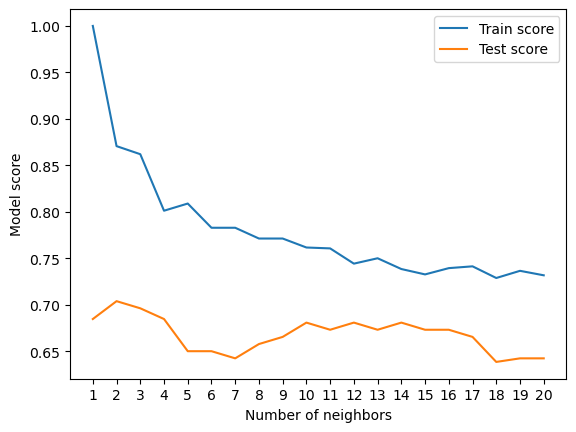

In [29]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

RandomForestClassifier()

... using RandomizedSearchCV

In [30]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [31]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                          refit = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [33]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.9730769230769231

# Hyperparameter tuning with GridSearchCV

We're going to tune:

RandomForestClassifier()

... using RandomizedSearchCV

In [34]:
kn_grid = {"n_neighbors": [15,20,25,30,35,40],
           "weights":["uniform","distance"],
           "algorithm": ["auto","brute"],
           "p":[1,2],           
           "metric":["euclidean","manhattan","minkowski","chebyshev"]}

In [35]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for KNeighborsClassifier
rs_kn = GridSearchCV(KNeighborsClassifier(), 
                           param_grid=kn_grid,
                           cv=5,
                           verbose=True,
                          refit = True,
                     scoring ="accuracy")

# Fit random hyperparameter search model for RandomForestClassifier()
rs_kn.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [15, 20, 25, 30, 35, 40], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

In [36]:
rs_kn.best_params_

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 30,
 'p': 1,
 'weights': 'distance'}

In [37]:
rs_kn.score(x_test,y_test)

0.7769230769230769

# Hyperparameter tuning with GridSearchCV

We're going to tune:

RandomForestClassifier()

... using RandomizedSearchCV

In [38]:
# Create a hyperparameter grid for RandomForestClassifier
gs_rf_grid = {"n_estimators": [100,50],
           "max_depth": [1,2,3],
           "min_samples_split": [2,3],
           "min_samples_leaf": [1]}

In [39]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(), 
                           param_grid=gs_rf_grid,
                           cv=5,
                           verbose=True,
                           refit=True)

# Fit random hyperparameter search model for RandomForestClassifier()
gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 50]},
             verbose=True)

In [40]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [41]:
gs_rf.score(x_test,y_test)

0.9076923076923077

Evaluting our tuned machine learning classifier, beyond accuracy
ROC curve and AUC score
Confusion matrix
Classification report
Precision
Recall
F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions

In [42]:
# Make predictions with tuned model
y_preds = gs_rf.predict(x_test)

In [43]:
y_preds

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [44]:
y_test

693     1
119     0
101     1
1031    1
333     0
       ..
84      1
137     1
1147    0
197     0
181     1
Name: target, Length: 260, dtype: int64

In [45]:
y_probs = gs_rf.predict_proba(x_test)

In [46]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.69573581, 0.29176594, 0.67349809, 0.68386483, 0.28486718,
       0.68182938, 0.24282449, 0.45478092, 0.46351842, 0.43319045,
       0.5791772 , 0.24994573, 0.84613262, 0.23597452, 0.44391516,
       0.86647019, 0.0098517 , 0.16452172, 0.85892283, 0.85573733,
       0.25950788, 0.00778468, 0.00763504, 0.19325118, 0.25983636,
       0.0098517 , 0.61902377, 0.54905734, 0.25758341, 0.25078323,
       0.00778468, 0.16238422, 0.69427231, 0.6963124 , 0.25831157,
       0.75948409, 0.48973497, 0.67145507, 0.23717101, 0.28663253,
       0.54608571, 0.89413268, 0.01090776, 0.78495176, 0.70503256,
       0.01177881, 0.01030491, 0.00822012, 0.78226512, 0.24432334,
       0.01030491, 0.01177881, 0.46863302, 0.47440667, 0.00846227,
       0.42262024, 0.46920252, 0.84668379, 0.32437411, 0.57943688,
       0.58361228, 0.70456208, 0.00823789, 0.4509947 , 0.49700275,
       0.01045455, 0.71041596, 0.22765026, 0.59227115, 0.30895896,
       0.28980312, 0.75948409, 0.00932405, 0.73774582, 0.64339

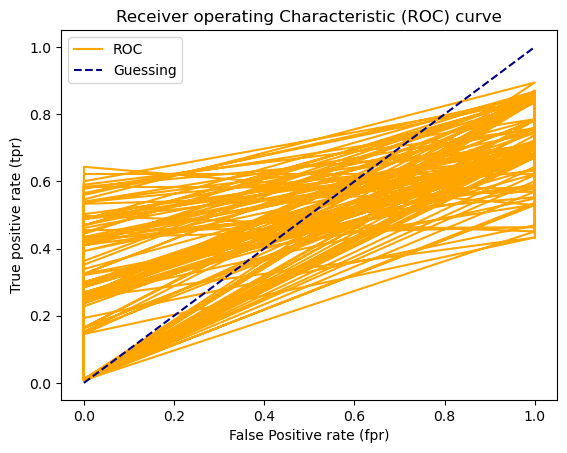

TypeError: cannot unpack non-iterable NoneType object

In [50]:
fpr,tpr,thresholds = plot_roc_curve(y_test,y_probs_positive)

In [51]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color = "orange",label = "ROC")
    plt.plot([0,1],[0,1],color = "darkblue",linestyle = "--",label ="Guessing")
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

In [52]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(fpr,tpr)

NameError: name 'fpr' is not defined

In [53]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[129  18]
 [  6 107]]


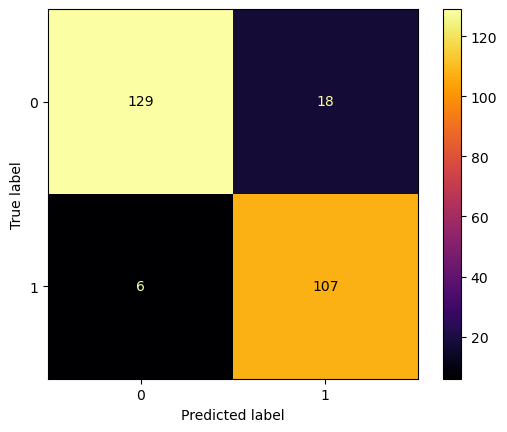

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=gs_rf, X=x_test, y=y_test,cmap ="inferno");

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated 
precision, recall and f1-score.

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91       147
           1       0.86      0.95      0.90       113

    accuracy                           0.91       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.91      0.91      0.91       260



Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [56]:
# Check best hyperparameters
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [57]:
clf = RandomForestClassifier(n_estimators=100,
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1)

In [58]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         transformed_x,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.99230769, 0.96923077, 0.96923077, 0.97692308, 0.94615385,
       0.91538462, 0.84496124, 0.82945736, 0.98449612, 1.        ])

In [59]:
cv_acc = np.mean(cv_acc)
cv_acc

0.942814549791294

In [60]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               transformed_x,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9669114360714968

In [61]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            transformed_x,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9440820395954994

In [62]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         transformed_x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9541332986443128

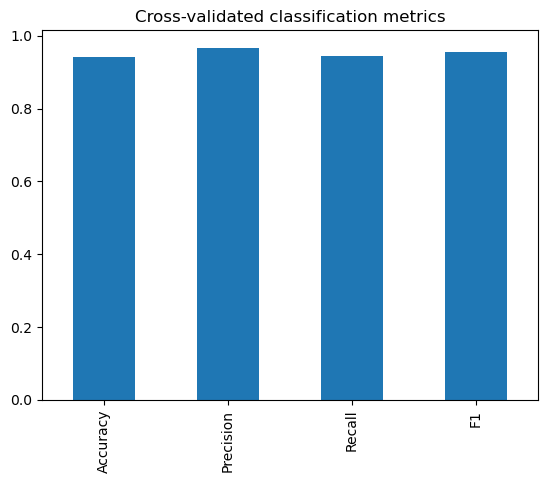

In [63]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model..

In [64]:
# Fit an instance of RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1)

clf.fit(x_train, y_train);

In [65]:
# Check coef_
clf.feature_importances_

array([0.12450332, 0.09614098, 0.03687407, 0.16875967, 0.04874476,
       0.12815826, 0.11827634, 0.03443611, 0.04976848, 0.0140267 ,
       0.05278638, 0.04681453, 0.03908849, 0.0416219 ])

In [66]:
df.head()

,femalestar,malestar,femalerasi,malerasi,thinam_porutham,kanam_porutham,magendhiram_porutham,sthirthirgam_porutham,yoni_porutham,Rasi_porutham,rasi_adhipathi_porutham,vasiyam_porutham,raji_porutham,vedhai_porutham,target
0,aswini,aswini,maesam,mesam,0,1,1,0,1,1,1,0,0,1,0
1,aswini,bharani,maesam,mesam,1,1,0,0,1,1,1,0,1,1,1
2,aswini,karthigai 1 padham,maesam,mesam,0,1,0,0,1,1,1,0,1,1,0
3,aswini,karthigai 2 3 4 padham,maesam,rishabam,0,1,0,0,1,0,1,0,1,1,0
4,aswini,rohini,maesam,rishabam,1,1,1,0,1,0,1,0,1,1,1


In [67]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'femalestar': 0.12450332116559822,
 'malestar': 0.09614098453151769,
 'femalerasi': 0.03687407299298495,
 'malerasi': 0.1687596706507272,
 'thinam_porutham': 0.04874476471032332,
 'kanam_porutham': 0.12815826158172858,
 'magendhiram_porutham': 0.11827634061191411,
 'sthirthirgam_porutham': 0.0344361110670599,
 'yoni_porutham': 0.049768479366190256,
 'Rasi_porutham': 0.014026698520845588,
 'rasi_adhipathi_porutham': 0.05278637560182339,
 'vasiyam_porutham': 0.04681453068810796,
 'raji_porutham': 0.039088491478782,
 'vedhai_porutham': 0.041621897032396826}

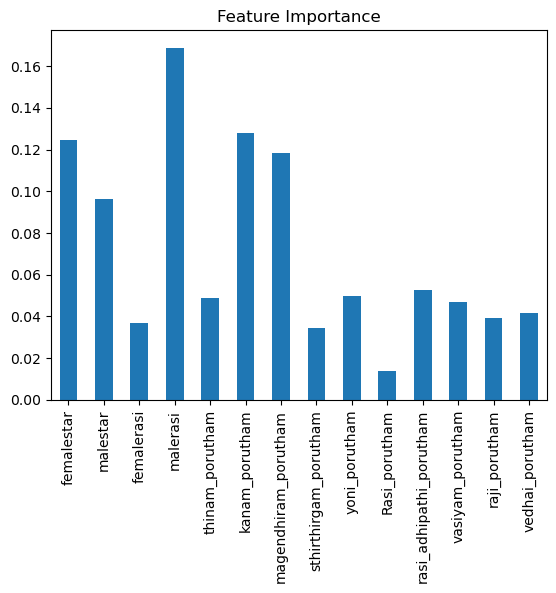

In [68]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [69]:
pd.crosstab(df["malerasi"], df["target"])

target,0,1
malerasi,,
dhanush,50,58
kadagam,63,45
kanni,64,44
kumbam,47,61
magaram,50,58
meenam,50,58
mesam,59,49
mithunam,72,36
rishabam,67,41


In [70]:
pd.crosstab(df["femalerasi"], df["target"])

target,0,1
femalerasi,,
dhanush,67,41
kadagam,47,61
kanni,56,52
kumbam,68,40
maesam,52,56
magaram,64,44
meenam,61,47
mithunam,46,62
rishabam,49,59


In [71]:
pd.crosstab(df["malestar"], df["target"])

target,0,1
malestar,,
anusam,19,17
astham,20,16
aswini,17,19
avitam 1 2 padham,14,22
avitam 3 4 padam,15,21
ayilyam,21,15
bharani,20,16
chithirai 1 2padham,19,17
chithirai 3 4 padham,19,17


In [72]:
pd.crosstab(df["femalestar"], df["target"])

target,0,1
femalestar,,
anusam,17,19
astham,13,23
aswini,16,20
avitam 1 2 padham,23,13
avitam 3 4 padam,25,11
ayilyam,19,17
bharani,14,22
chithirai 1 2padham,25,11
chithirai 3 4 padham,26,10


In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
mean_squared_error(y_test,y_preds)

0.09230769230769231